In [5]:
import os
import re
import pandas as pd
import numpy as np

degrees_path = 'directed_hyperbolic_graphs/networks_data/degrees/'
degrees = dict()
for csv in os.listdir(degrees_path):
    if csv[0] != '.':
        R, N = re.findall('R(.*)a2N(.*).csv', csv)[0]
        print(degrees_path + csv)
        degrees[(float(R), int(N))] = pd.read_csv(degrees_path + csv, sep='\t')

directed_hyperbolic_graphs/networks_data/degrees/R6.10632a2N10000.csv
directed_hyperbolic_graphs/networks_data/degrees/R5.07019a2N10000.csv
directed_hyperbolic_graphs/networks_data/degrees/R7.14248a2N10000.csv
directed_hyperbolic_graphs/networks_data/degrees/R5.41556a2N10000.csv
directed_hyperbolic_graphs/networks_data/degrees/R7a2N1889.csv
directed_hyperbolic_graphs/networks_data/degrees/R4.72485a2N10000.csv
directed_hyperbolic_graphs/networks_data/degrees/R6a2N25565.csv
directed_hyperbolic_graphs/networks_data/degrees/R6.45171a2N10000.csv
directed_hyperbolic_graphs/networks_data/degrees/R5.5a2N9405.csv
directed_hyperbolic_graphs/networks_data/degrees/R7.83326a2N10000.csv
directed_hyperbolic_graphs/networks_data/degrees/R6a2N2557.csv
directed_hyperbolic_graphs/networks_data/degrees/R8a2N13958.csv
directed_hyperbolic_graphs/networks_data/degrees/R4.37954a2N10000.csv
directed_hyperbolic_graphs/networks_data/degrees/R5.76094a2N10000.csv
directed_hyperbolic_graphs/networks_data/degrees/R7

In [55]:
from directed_hyperbolic_graphs.dirhypernets import *
plt_rescale = lambda scale=1.5: plt.gcf().set_size_inches(scale*np.array(plt.gcf().get_size_inches()))

zeta = 2
get_nu = lambda R, N, zeta: N/(2*np.pi*(np.cosh(zeta*R) - 1))

fix_nu_dict = {R_N : np.around(get_nu(*R_N, zeta), 4) for R_N in degrees.keys() if R_N[1] != 10000}
fix_N_dict = {R_N : np.around(get_nu(*R_N, zeta), 5) for R_N in degrees.keys() if R_N[1] == 10000}

## in-degree distributions

In [286]:
def plot_degrees(in_degree, label, color, markersize=3):
    global zeta
    plot_distribution(
        *degree_distribution(in_degree),
        fmt='o', c=color, markersize=markersize
    )
    plot_distribution(
        *log_binning(in_degree, 25),
        fmt='o-', c=color, markersize=markersize,
        plt_type='log', label=label
    )
    return

In [252]:
params = {
    'legend.fontsize': 'medium',
    'axes.labelsize': 'x-large',
    'axes.titlesize':'xx-large'
}
plt.rcParams.update(params)

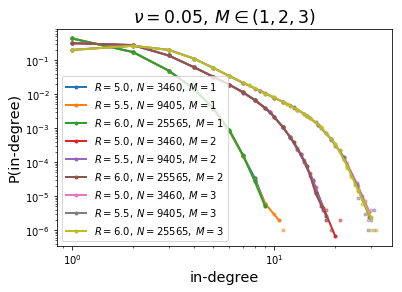

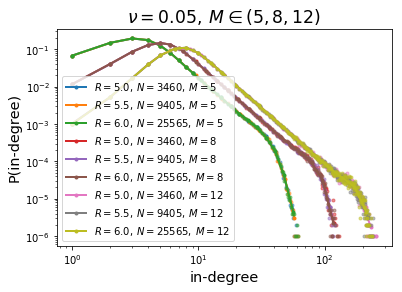

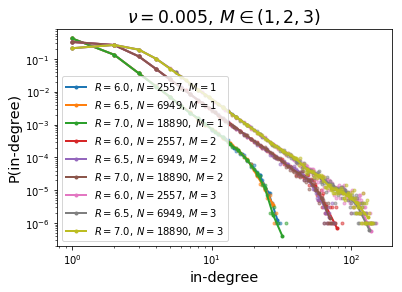

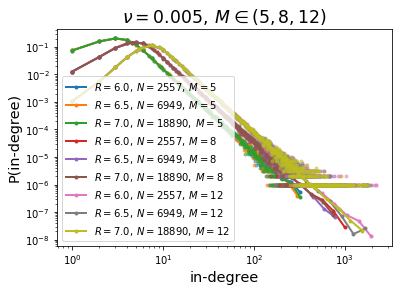

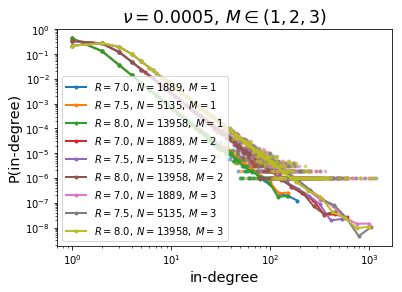

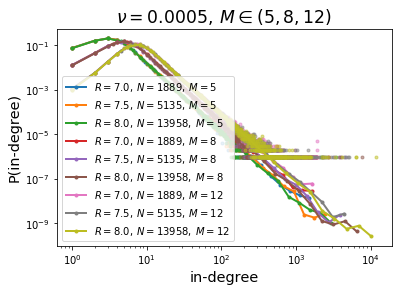

In [288]:
for fix_nu in (0.05, 0.005, 0.0005):
    i = 0
    for M in (1, 2, 3):
        for R_N, nu in sorted(fix_nu_dict.items()):
            if nu == fix_nu:
                in_degree = degrees[R_N][degrees[R_N].m == M].in_degree.tolist()
                plot_degrees(in_degree, '$R = {},\:N = {},\:M = {}$'.format(*R_N, M), 'C{}'.format(i), markersize=3)
                i += 1
    # plt_rescale(3)
    plt.title('$\\nu = {},\:M \in (1, 2, 3)$'.format(fix_nu))
    plt.xlabel('in-degree')
    plt.ylabel('P(in-degree)')
    plt.legend()
    # plt.savefig('images/nu = {}, M in (1, 2, 3).png'.format(fix_nu))
    plt.show()
    i = 0
    for M in (5, 8, 12):
        for R_N, nu in sorted(fix_nu_dict.items()):
            if nu == fix_nu:
                in_degree = degrees[R_N][degrees[R_N].m == M].in_degree.tolist()
                plot_degrees(in_degree, '$R = {},\:N = {},\:M = {}$'.format(*R_N, M), 'C{}'.format(i), markersize=3)
                i += 1
    # plt_rescale(3)
    plt.title('$\\nu = {},\:M \in (5, 8, 12)$'.format(fix_nu))
    plt.xlabel('in-degree')
    plt.ylabel('P(in-degree)')
    plt.legend()
    # plt.savefig('images/nu = {}, M in (5, 8, 12).png'.format(fix_nu))
    plt.show()

In [235]:
print('\t' + ',\n\t'.join(map(lambda nu: "'nu = {}.png'".format(nu), sorted(fix_N_dict.values(), reverse=True))))

	'nu = 0.5.png',
	'nu = 0.25059.png',
	'nu = 0.1256.png',
	'nu = 0.06295.png',
	'nu = 0.03155.png',
	'nu = 0.01581.png',
	'nu = 0.00792.png',
	'nu = 0.00397.png',
	'nu = 0.00199.png',
	'nu = 0.001.png',
	'nu = 0.0005.png'


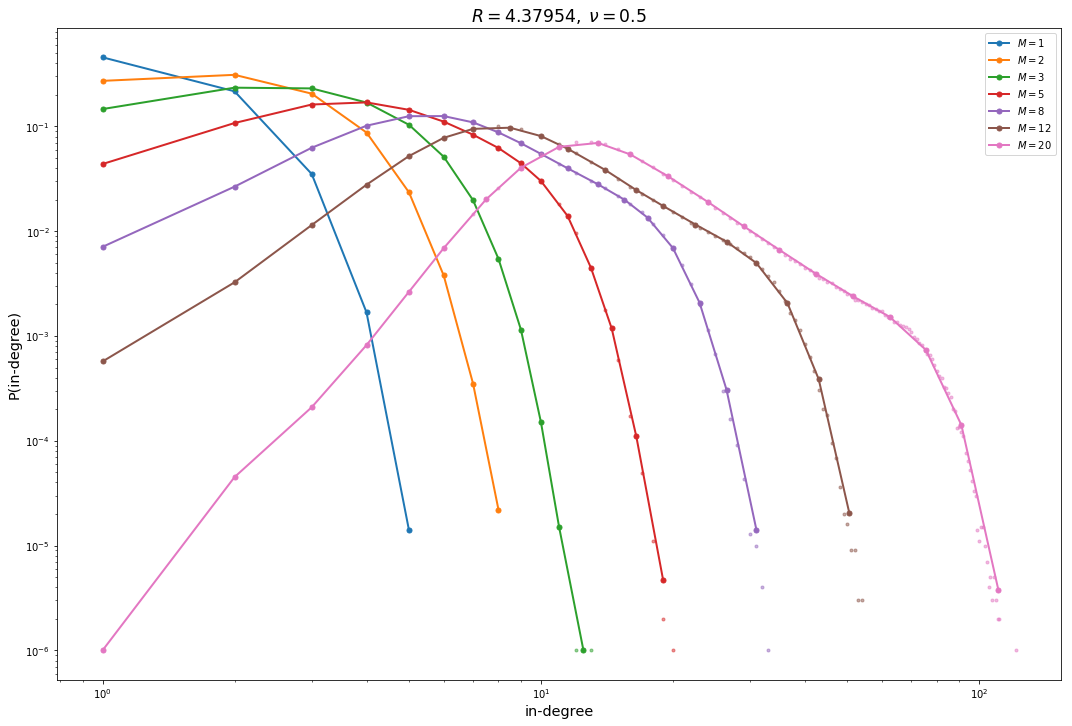

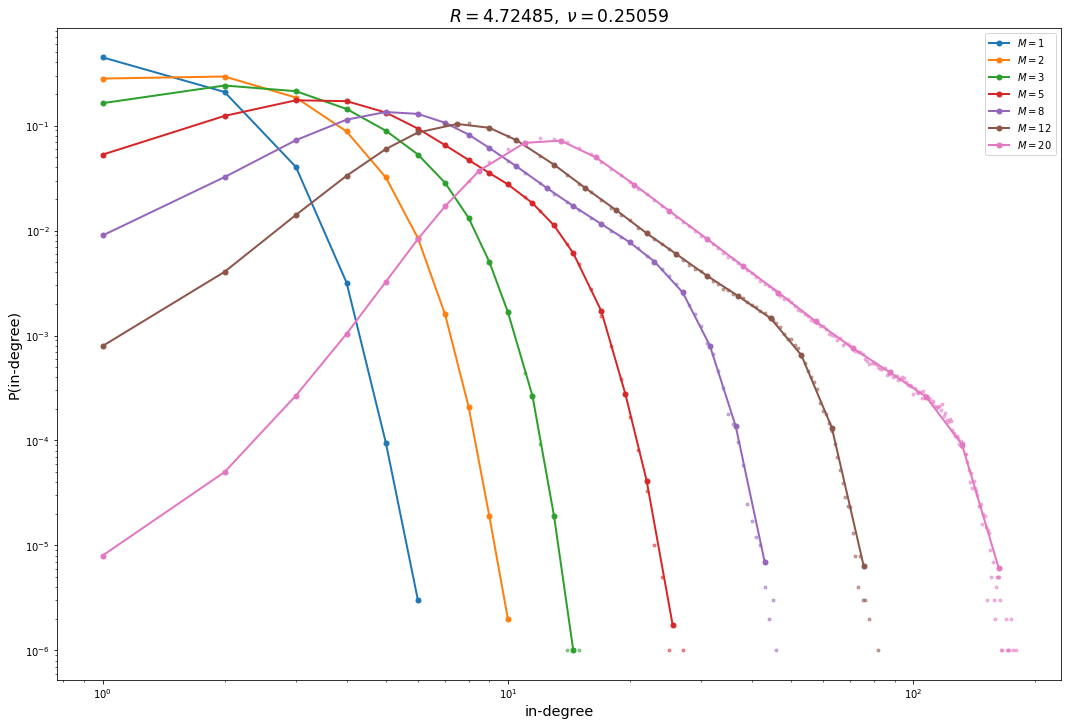

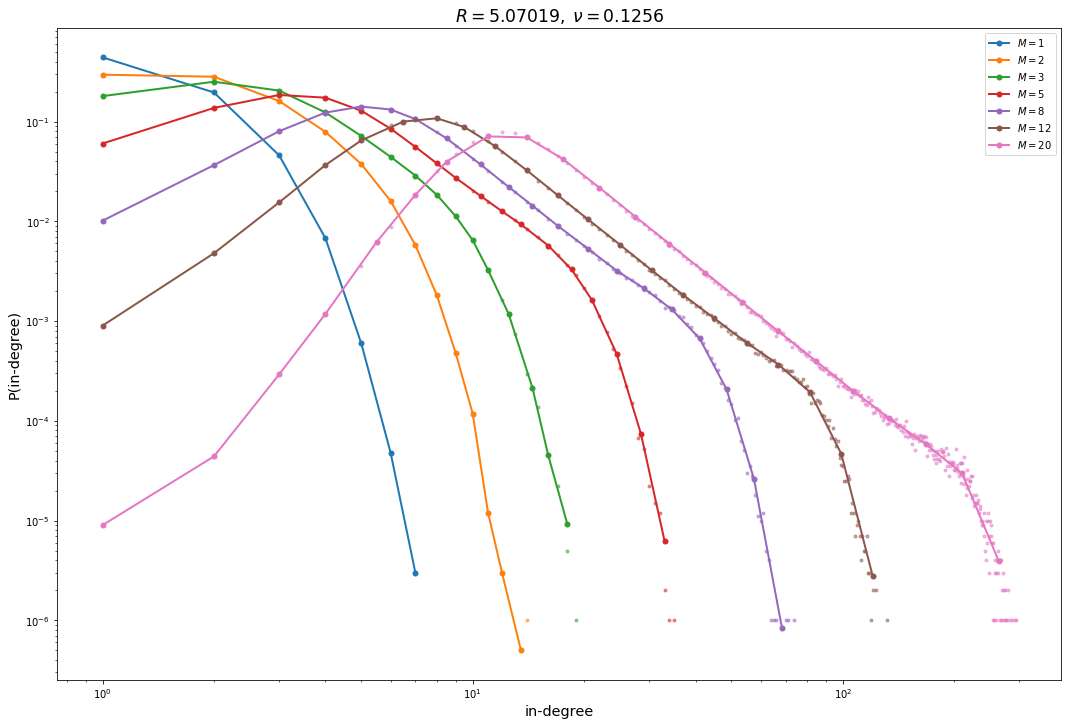

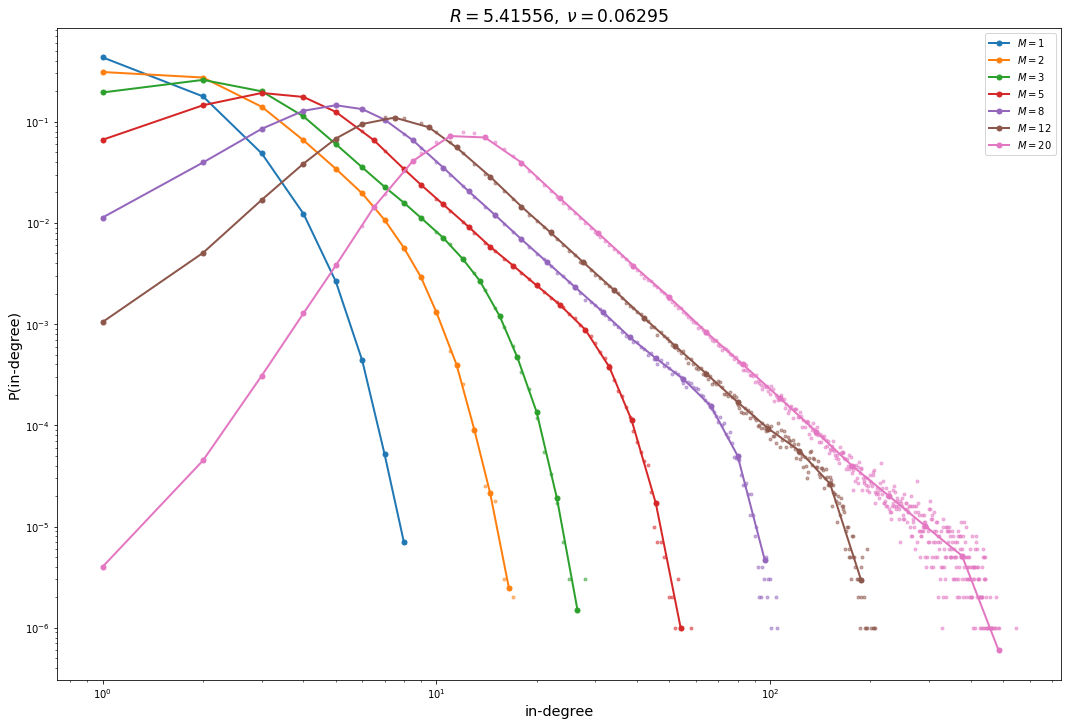

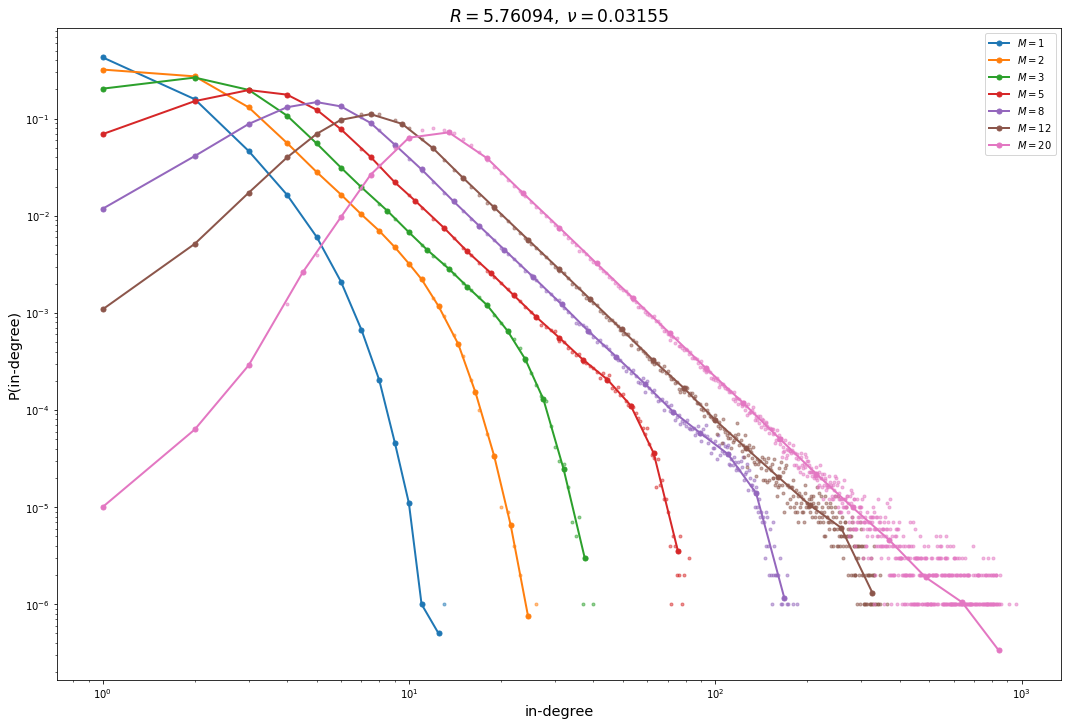

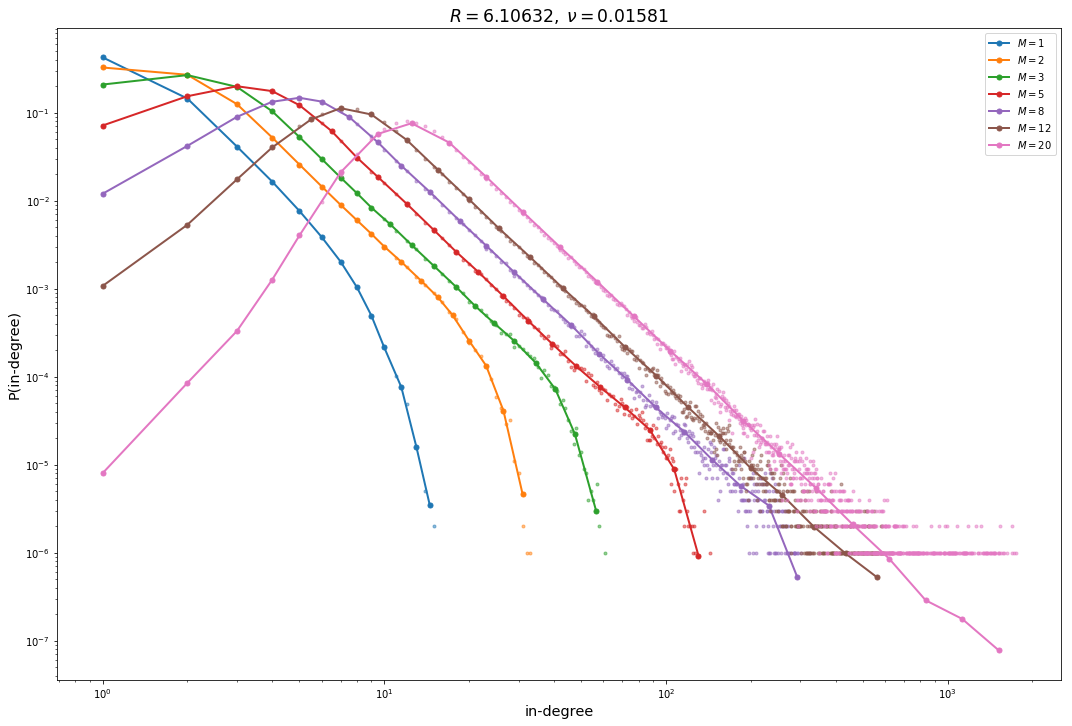

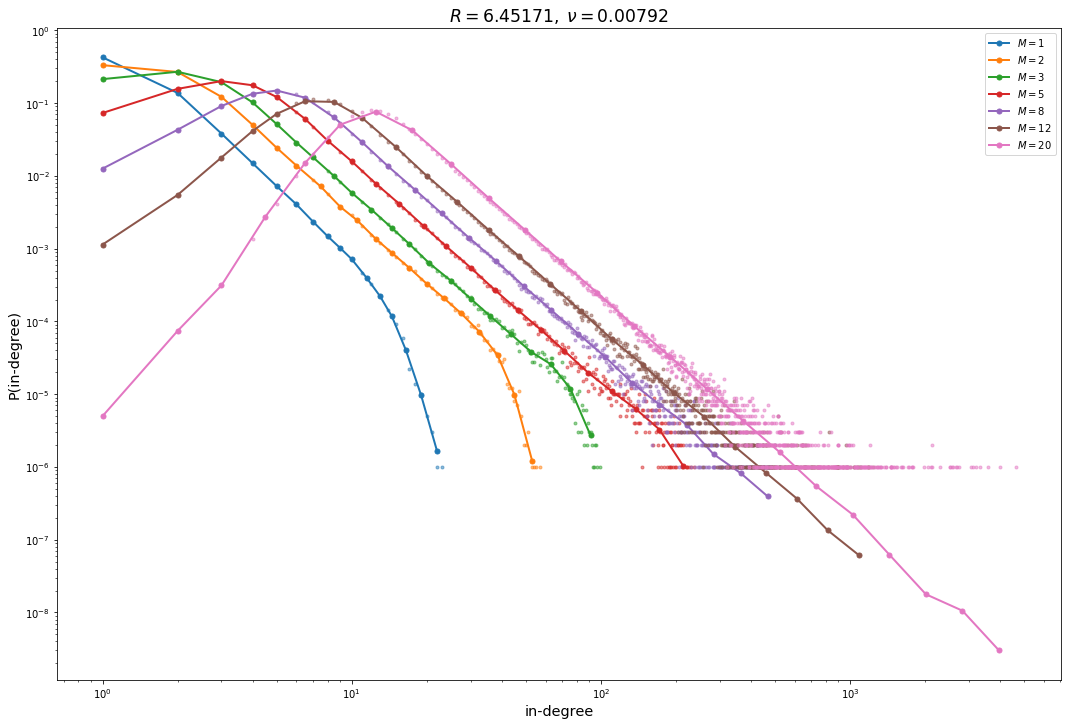

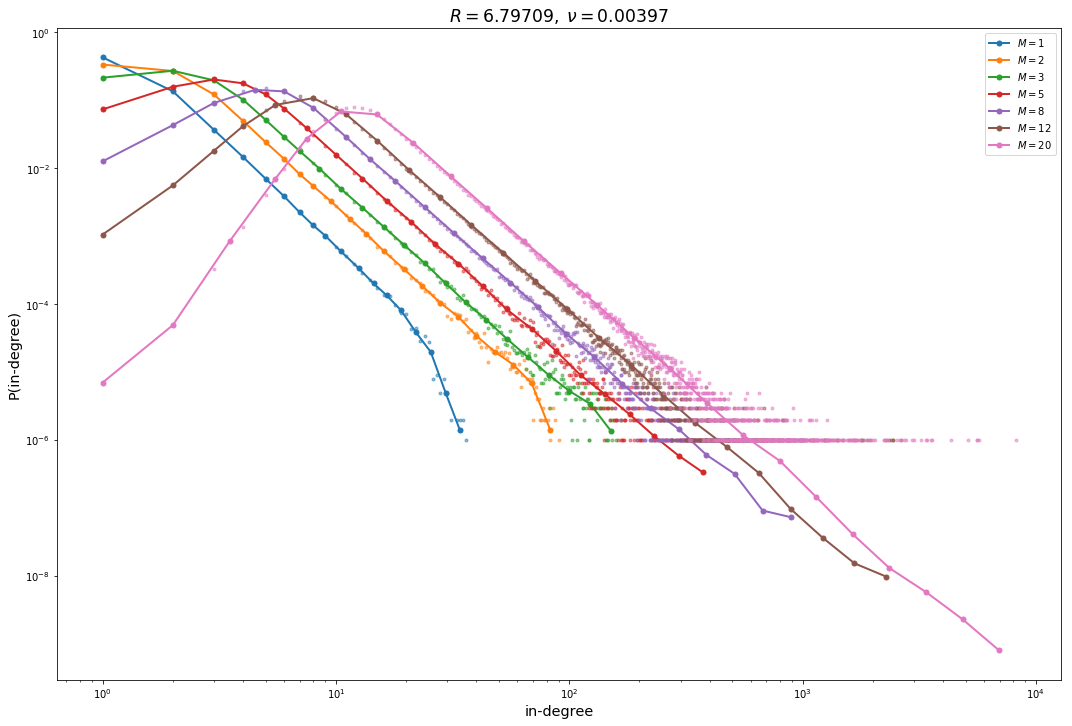

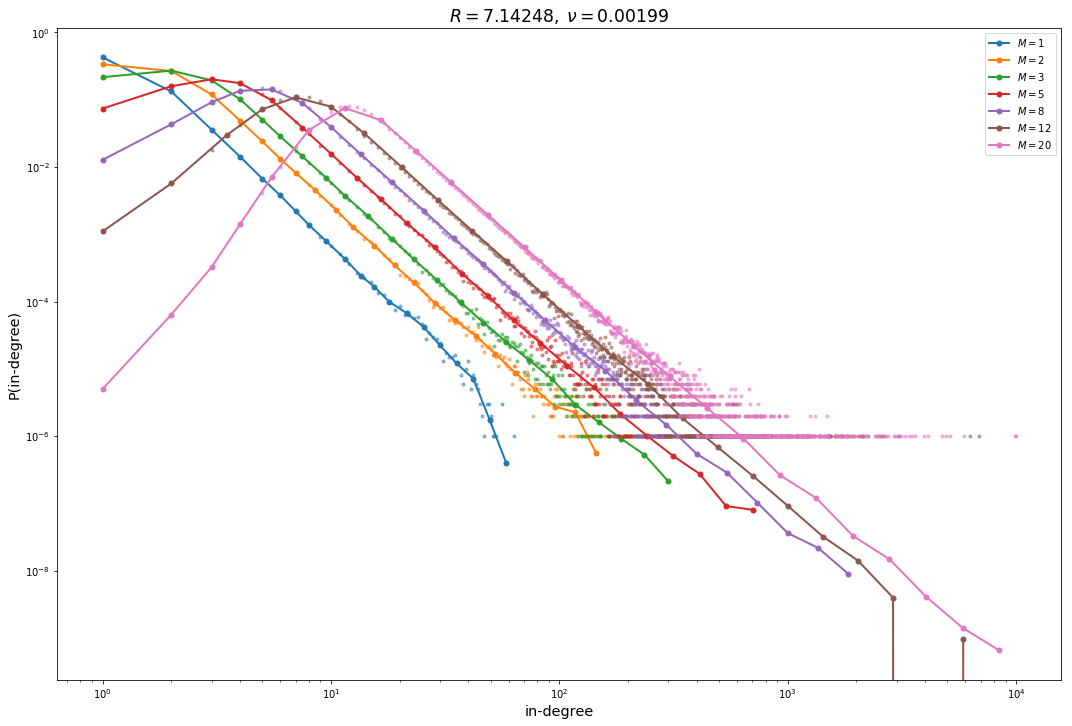

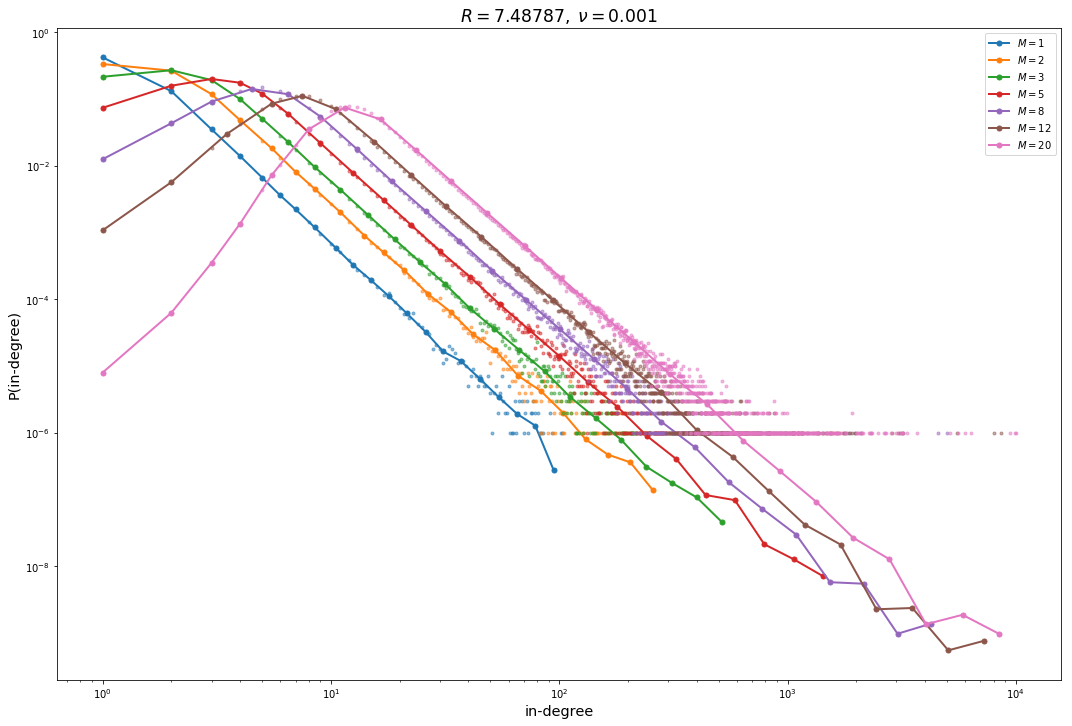

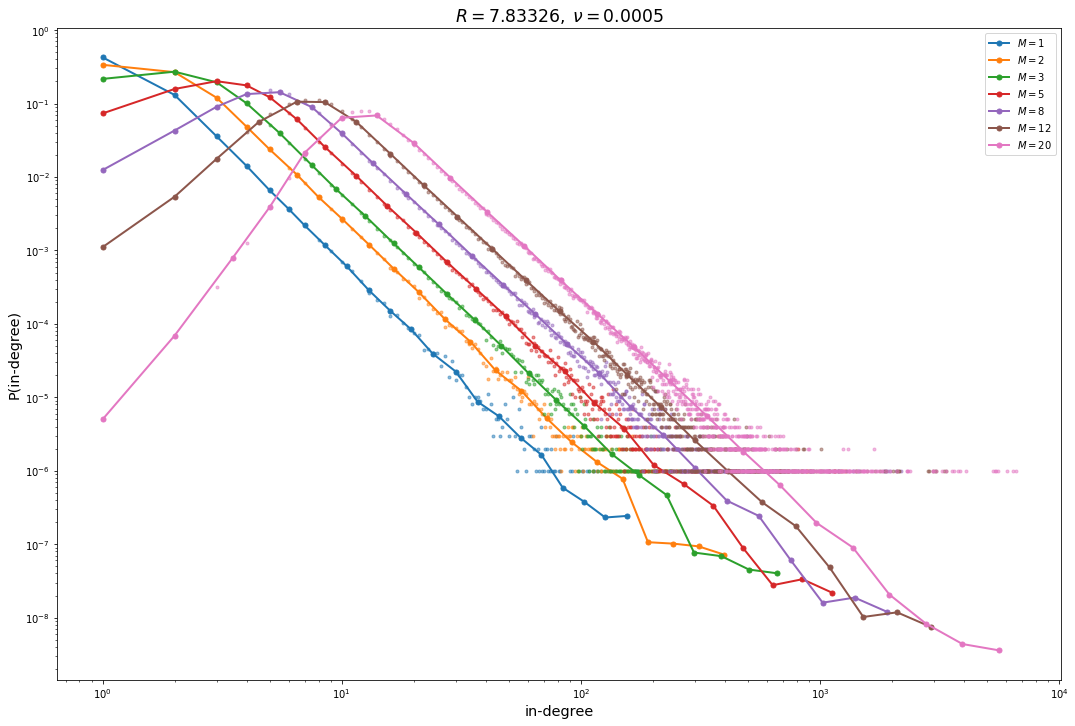

In [269]:
for R_N, nu in sorted(fix_N_dict.items()):
    for i, M in enumerate((1, 2, 3, 5, 8, 12, 20)):
        in_degree = degrees[R_N][degrees[R_N].m == M].in_degree.tolist()
        plot_degrees(in_degree, '$M = {}$'.format(M), 'C{}'.format(i))
    plt_rescale(3)
    plt.title('$R = {},\:\\nu = {}$'.format(R_N[0], nu))
    plt.xlabel('in-degree')
    plt.ylabel('P(in-degree)')
    plt.legend()
    plt.savefig('images/nu = {}.png'.format(nu))
    plt.show()

In [233]:
print('\t' + ',\n\t'.join(map(lambda nu: "'M = {}.png'".format(nu), (1, 2, 3, 5, 8, 12, 20))))

	'M = 1.png',
	'M = 2.png',
	'M = 3.png',
	'M = 5.png',
	'M = 8.png',
	'M = 12.png',
	'M = 20.png'


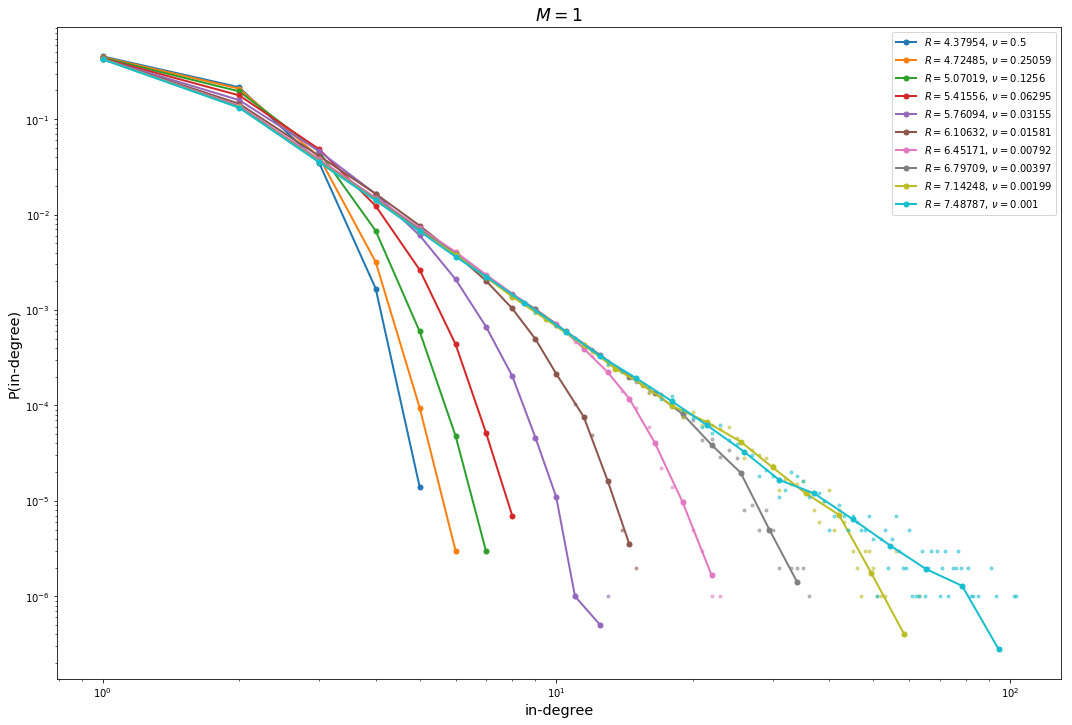

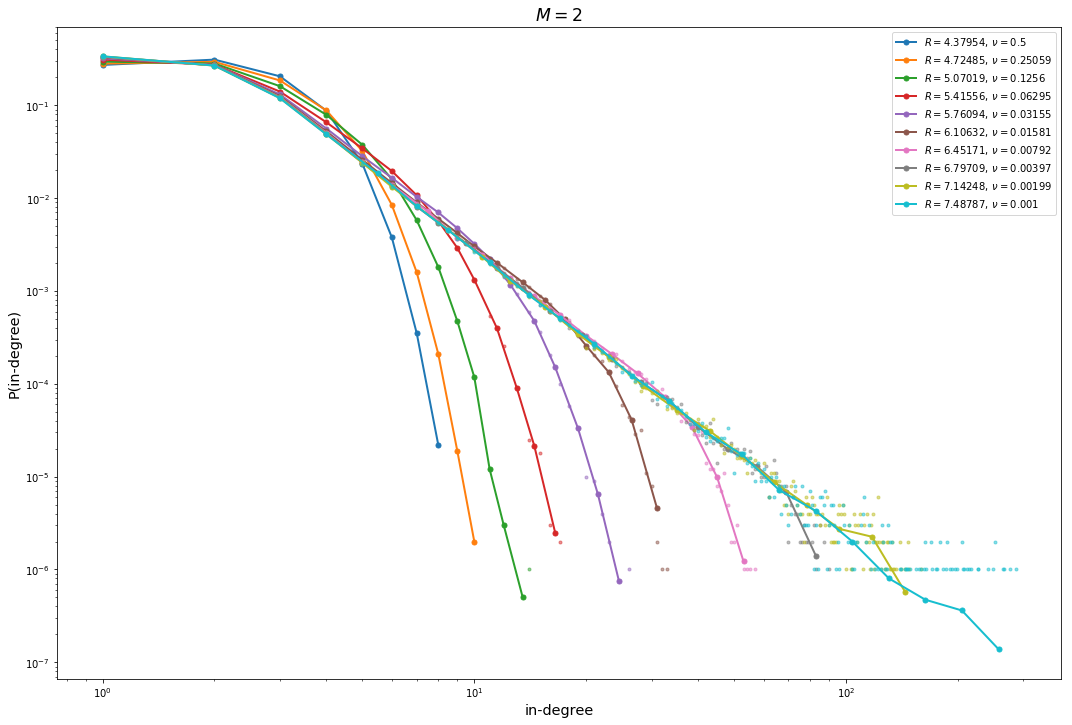

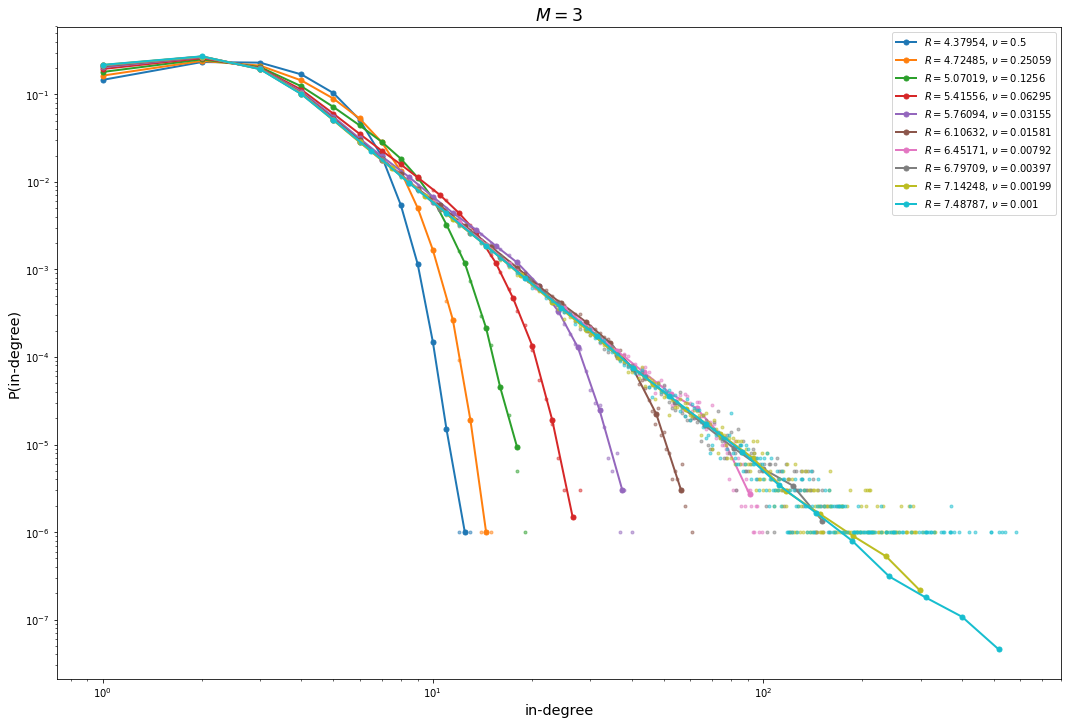

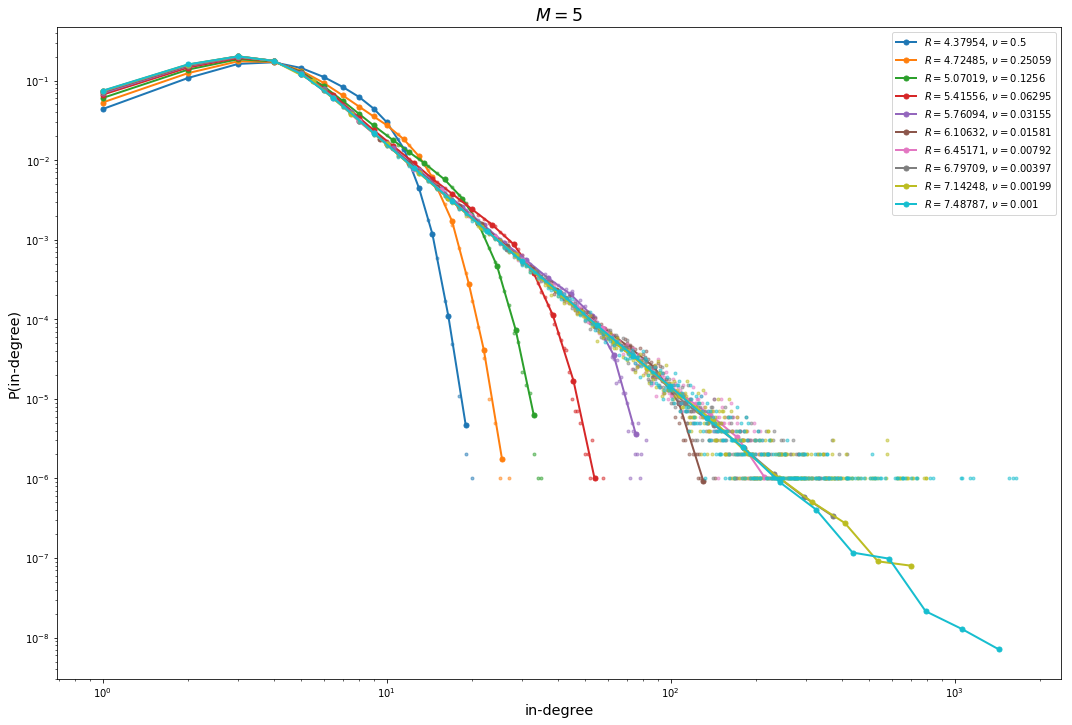

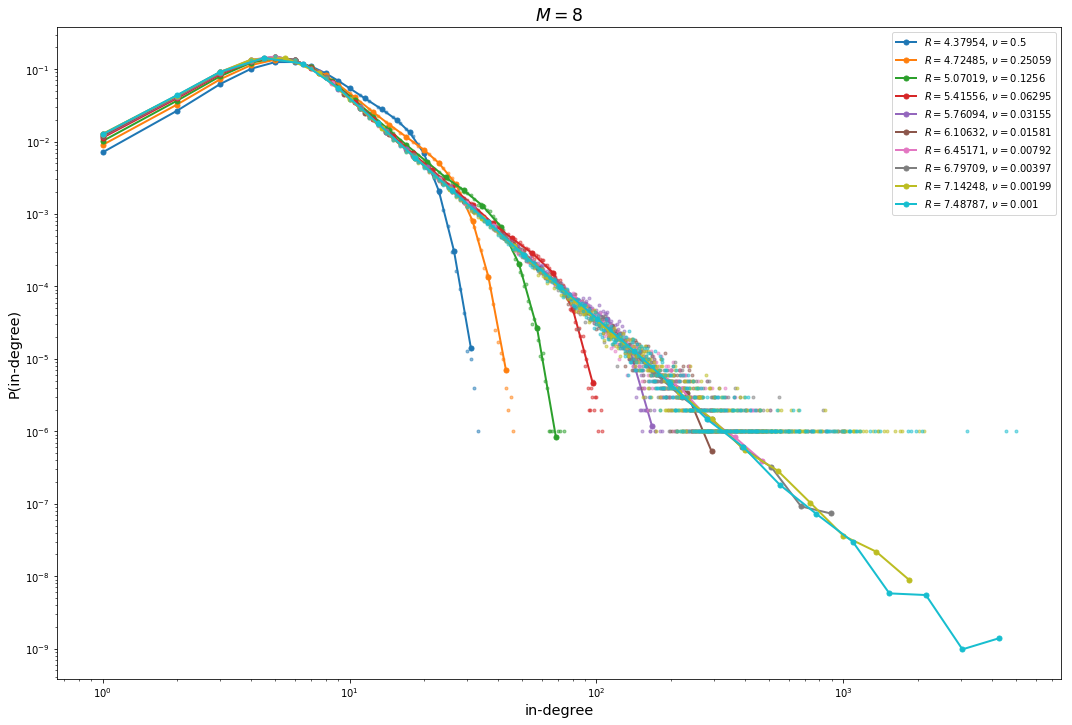

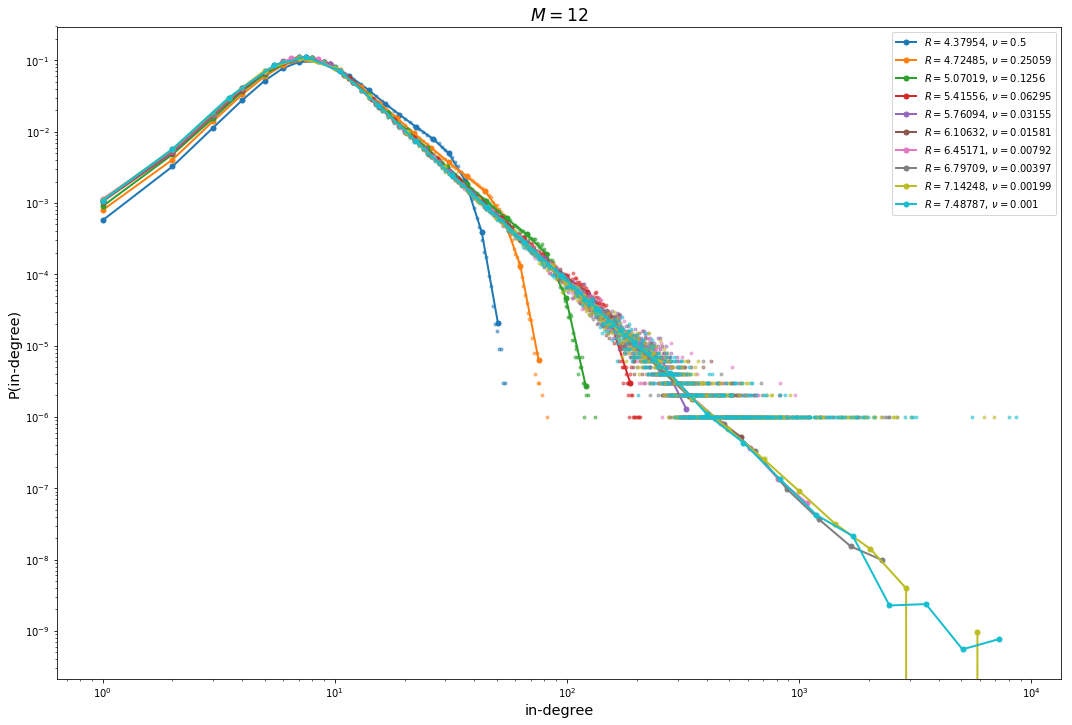

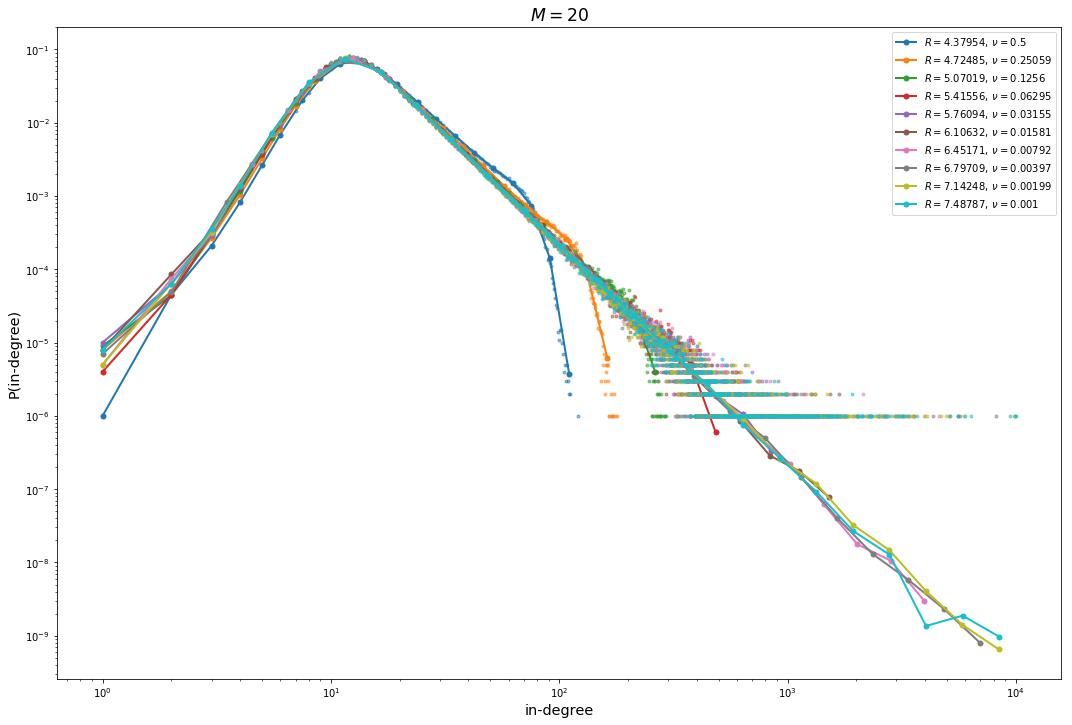

In [270]:
for M in (1, 2, 3, 5, 8, 12, 20):
    for i, (R_N, nu) in list(enumerate(sorted(fix_N_dict.items())))[:-1]:
        in_degree = degrees[R_N][degrees[R_N].m == M].in_degree.tolist()
        plot_degrees(in_degree, '$R = {},\:\\nu = {}$'.format(R_N[0], nu), 'C{}'.format(i))
    plt_rescale(3)
    plt.title('$M = {}$'.format(M))
    plt.xlabel('in-degree')
    plt.ylabel('P(in-degree)')
    plt.legend()
    plt.savefig('images/M = {}.png'.format(M))
    plt.show()

## bidirected edges fraction

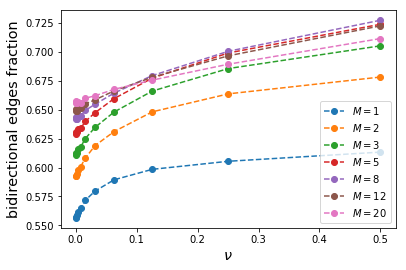

In [289]:
bi_frac = lambda R_N, M, n=100: sum(degrees[R_N][degrees[R_N].m == M].bi_degree)/(R_N[1]*M*n)

for M in (1, 2, 3, 5, 8, 12, 20):
    plt.plot(
        [get_nu(*R_N, zeta) for R_N in R_N_list],
        [bi_frac(R_N, M) for R_N in R_N_list],
        'o--', label='$M = {}$'.format(M)
    )
plt.legend()
plt.xlabel('$\\nu$')
plt.ylabel('bidirectional edges fraction')
# plt_rescale(3)
# plt.savefig('images/bi_frac.png'.format(nu))
plt.show()

## average-degree distributions (as a function of r)
## numerical average-degree distributions (m = 1)

In [183]:
from scipy.integrate import quad, dblquad
from mpmath import mp

mp.dps = 50
mp.pretty = True

pi, cos, sin = mp.pi, mp.cos, mp.sin
cosh, sinh  = mp.cosh, mp.sinh
sqrt, acos, asin, acosh = mp.sqrt, mp.acos, mp.asin, mp.acosh
tan, tanh, atan = mp.tan, mp.tanh, mp.atan

def theta_max(R, y, r, zeta):
    R *= zeta; y *= zeta; r *= zeta
    cos_t = (cosh(y)*cosh(R) - cosh(r))/(sinh(y)*sinh(R))
    t = acos(cos_t) if cos_t**2 <= 1. else (np.pi if cos_t <= -1 else 0.)
    return t

def A_func(R, y, r, theta, zeta):
    R *= zeta; y *= zeta; r *= zeta
    cosh_r = cosh(y)*cosh(r) - sinh(y)*sinh(r)*cos(theta)
    A = 2*pi*(cosh_r - 1)
    if r + y > R:
        t_max = theta_max(R, y, acosh(cosh_r), 1.)
        frac_sinh = sqrt(cosh_r**2 - 1)/sinh(y)
        A -= 2*cosh_r*atan(cosh(y)*tan(t_max))
        A -= 2*cosh_r*atan(
            (cosh_r*sin(t_max))/
            sqrt(frac_sinh**2 - sin(t_max)**2)
        )
        A += 2*asin(sin(t_max)/frac_sinh)
        A += 2*t_max*cosh(R)
    return A

k_func = lambda r, nu, R, zeta: dblquad(
    lambda y, theta, r=r, nu=nu, R=R, zeta=zeta: 2*(
        nu*zeta*sinh(zeta*y)*
        mp.exp(-nu*A_func(R, y, r, theta, zeta))
    ),
    0., np.pi, lambda x: 0., lambda x: R
)[0]

In [181]:
radius_in_degrees = dict()

for R_N, nu in sorted(fix_nu_dict.items()):
    df = degrees[R_N][degrees[R_N].m == 1][['radius_x', 'in_degree']]
    df['r'] = df['radius_x'].apply(lambda r: np.around(r, 2))
    radius_in_degrees[R_N] = df.groupby('r')['in_degree'].mean()

In [189]:
x_y = dict()
for R_N, nu in sorted(fix_nu_dict.items()):
    delta = 0.1
    x_y[R_N] = []
    print(R_N, nu)
    for r in np.arange(0., R_N[0] + delta, delta):
        print(r, end = ' ')
        x_y[R_N].append((r, k_func(r, get_nu(*R_N, zeta), R_N[0], zeta)))
    print()

(5.0, 3460) 0.05
0.0 0.1 0.2 0.30000000000000004 0.4 0.5 0.6000000000000001 0.7000000000000001 0.8 0.9 1.0 1.1 1.2000000000000002 1.3 1.4000000000000001 1.5 1.6 1.7000000000000002 1.8 1.9000000000000001 2.0 2.1 2.2 2.3000000000000003 2.4000000000000004 2.5 2.6 2.7 2.8000000000000003 2.9000000000000004 3.0 3.1 3.2 3.3000000000000003 3.4000000000000004 3.5 3.6 3.7 3.8000000000000003 3.9000000000000004 4.0 4.1000000000000005 4.2 4.3 4.4 4.5 4.6000000000000005 4.7 4.800000000000001 4.9 5.0 
(5.5, 9405) 0.05
0.0 0.1 0.2 0.30000000000000004 0.4 0.5 0.6000000000000001 0.7000000000000001 0.8 0.9 1.0 1.1 1.2000000000000002 1.3 1.4000000000000001 1.5 1.6 1.7000000000000002 1.8 1.9000000000000001 2.0 2.1 2.2 2.3000000000000003 2.4000000000000004 2.5 2.6 2.7 2.8000000000000003 2.9000000000000004 3.0 3.1 3.2 3.3000000000000003 3.4000000000000004 3.5 3.6 3.7 3.8000000000000003 3.9000000000000004 4.0 4.1000000000000005 4.2 4.3 4.4 4.5 4.6000000000000005 4.7 4.800000000000001 4.9 5.0 5.100000000000000

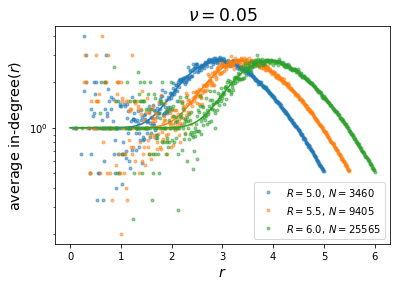

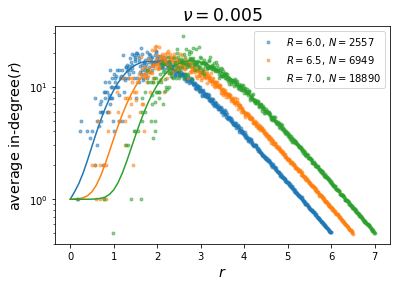

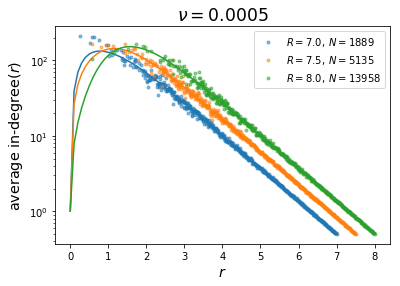

In [280]:
for fix_nu in (0.05, 0.005, 0.0005):
    R_Ns = [R_N for R_N, nu in sorted(fix_nu_dict.items()) if nu == fix_nu]
    for i, R_N in enumerate(R_Ns):
        radius_in_degree = radius_in_degrees[R_N]
        x, y = np.array(x_y[R_N] if i < 2 else x_y[R_N][:-9]).T
        plt.plot(
            radius_in_degree.index.tolist(),
            radius_in_degree.tolist(),
            'C{}o'.format(i), markersize=3, alpha=0.5,
            label='$R = {},\:N = {}$'.format(*R_N)
        )
        plt.plot(x, y, 'C{}'.format(i))
    plt.legend()
    plt.yscale('log')
    plt.title('$\\nu = {}$'.format(fix_nu))
    plt.xlabel('$r$')
    plt.ylabel('average in-degree($r$)')
    # plt_rescale(3)
    plt.savefig('images_/k(r), nu = {}, M = 1.png'.format(fix_nu))
    plt.show()